<a href="https://colab.research.google.com/github/miguelgargallo/jupyter-notebook/blob/main/04-tensorflow-pirates-chatbot" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [163]:
#importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [164]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [165]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [166]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting
...,...,...
76,tell me more about the pre requisites,prerequisites
77,give more details about the pre-requisites,prerequisites
78,What are the requirements,prerequisites
79,what's the basic requirements,prerequisites


In [167]:
data = data.sample(frac=1)

In [168]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
23,i will catch you later,goodbye
31,i am fine how are you,howami
78,what are the requirements,prerequisites
36,hows everything going on,howami
67,where is the straw hat center located,whereisthecenter
...,...,...
15,thanks,goodbye
9,hi nice to meet you,greeting
5,hi,greeting
37,is everything okay,howami


In [169]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [170]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [171]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  96
output length:  8


In [172]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [173]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [174]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 110ms/step - loss: 2.0820 - accuracy: 0.0617
Epoch 2/200
3/3 [==============================] - 0s 100ms/step - loss: 2.0788 - accuracy: 0.1728
Epoch 3/200
3/3 [==============================] - 0s 98ms/step - loss: 2.0763 - accuracy: 0.2346
Epoch 4/200
3/3 [==============================] - 0s 99ms/step - loss: 2.0737 - accuracy: 0.2222
Epoch 5/200
3/3 [==============================] - 0s 120ms/step - loss: 2.0710 - accuracy: 0.2222
Epoch 6/200
3/3 [==============================] - 0s 100ms/step - loss: 2.0682 - accuracy: 0.2346
Epoch 7/200
3/3 [==============================] - 0s 56ms/step - loss: 2.0651 - accuracy: 0.2346
Epoch 8/200
3/3 [==============================] - 0s 53ms/step - loss: 2.0622 - accuracy: 0.2099
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0586 - accuracy: 0.2099
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0547 - accuracy: 0.2099
Epoch 11/200
3/3 

3/3 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.8642
Epoch 85/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.8765
Epoch 86/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.8765
Epoch 87/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.8642
Epoch 88/200
3/3 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.8642
Epoch 89/200
3/3 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.8642
Epoch 90/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.8642
Epoch 91/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.8765
Epoch 92/200
3/3 [==============================] - 0s 51ms/step - loss: 0.5507 - accuracy: 0.9136
Epoch 93/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.9136
Epoch 94/200
3/3 [==============

3/3 [==============================] - 0s 4ms/step - loss: 0.1185 - accuracy: 0.9877
Epoch 168/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9877
Epoch 169/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.9877
Epoch 170/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.9877
Epoch 171/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9877
Epoch 172/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 1.0000
Epoch 177/200
3/3 [=====

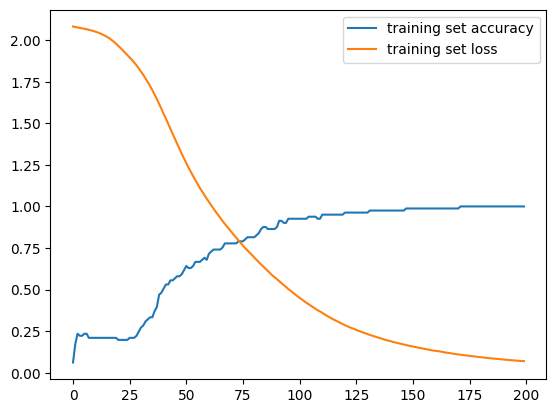

In [175]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [177]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Going Merry : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : Hi
1/1 [==============================] - 0s 13ms/step
Going Merry :  Hello my friend, How can I help you ?
You : who are you
1/1 [==============================] - 0s 15ms/step
Going Merry :  You can call me TechBot and I am here to Help you
You : how I can join piretaes?
1/1 [==============================] - 0s 14ms/step
Going Merry :  contact the closest straw hat center from your location
You : where is the straw
1/1 [==============================] - 0s 13ms/step
Going Merry :  you gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire world or you need to be as strong and intelligent as god usop
You : what are the requisites
1/1 [==============================] - 0s 13ms/step
Going Merry :  you gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire world or you need to be as strong and intelligent as god usop
You : what are t